# Setup

## Libraries

In [2]:
# using LinearAlgebra
using SparseArrays
# using Random
using CairoMakie
# using Statistics
# using ProgressMeter
using DataFrames
using DelimitedFiles

In [3]:
include("../Scripts/EchoStateNetworks.jl")
using .EchoStateNetworks
include("../Scripts/ONReservoir.jl")
using .ONReservoir
include("../Scripts/TurningError.jl")
using .TurningError
include("../Scripts/TestingFunctions.jl")
using .TestingFunctions

SystemError: SystemError: opening file "/Users/hectormorlet/Desktop/Uni/Honours Research/echo-state-networks/Scripts/EchoStateNetworks.jl": No such file or directory

## Read in Lorenz testing data

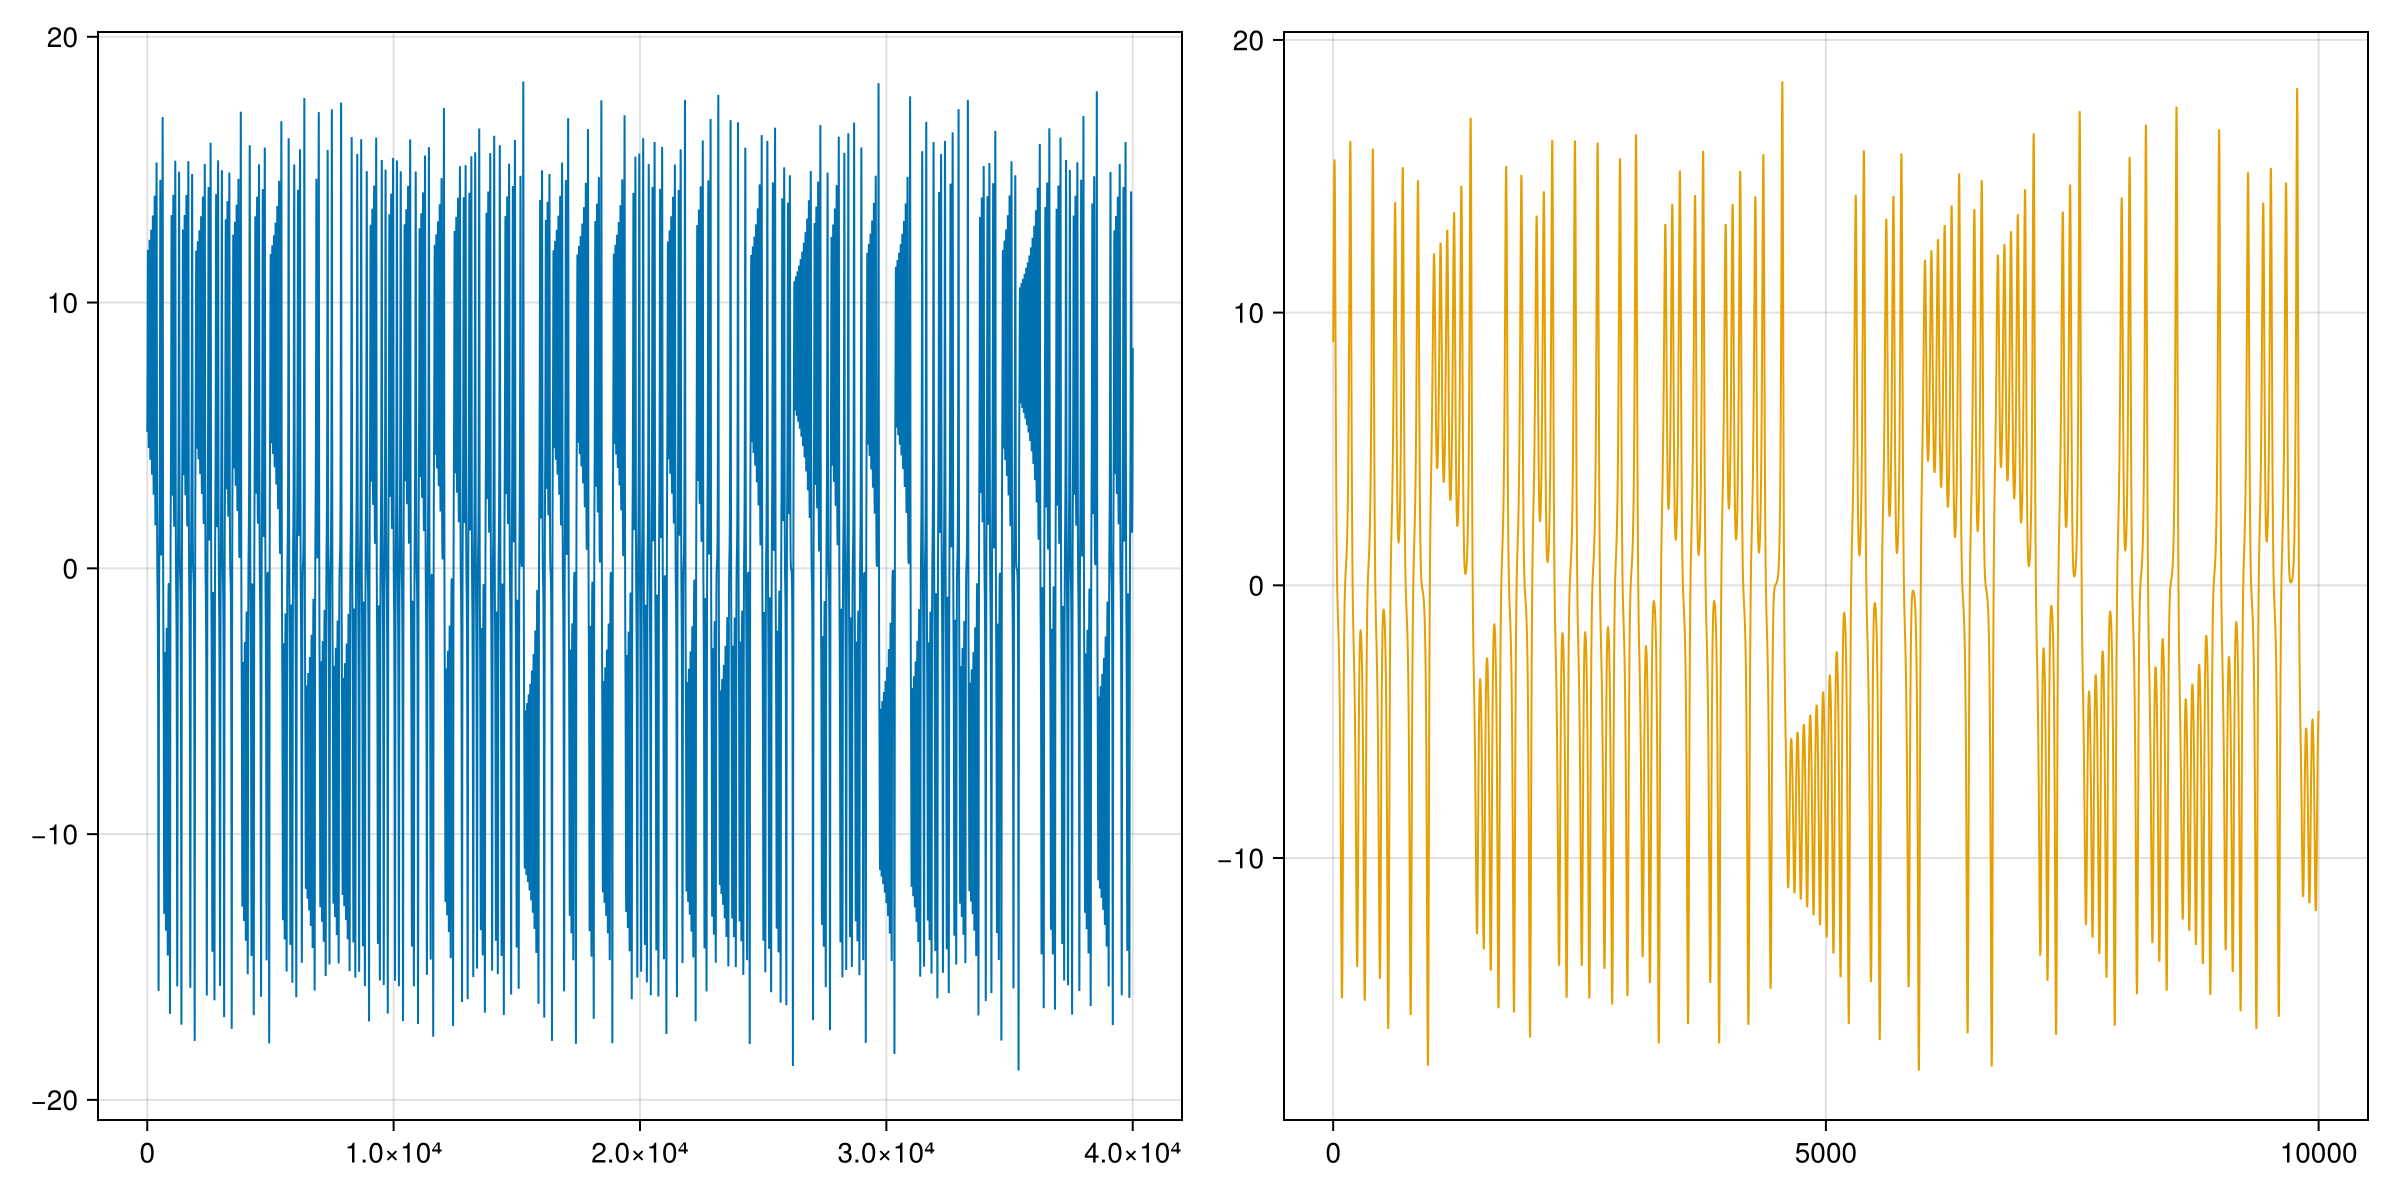

In [4]:
lo_train = vec(readdlm("../Data/lorenz_train_0_01.txt"))
lo_test = vec(readdlm("../Data/lorenz_test_0_01.txt"))

fig = Figure( size = (1200,600) )
lines!(Axis(fig[1,1]), lo_train; linewidth = 1.0, color = Cycled(1))
lines!(Axis(fig[1,2]), lo_test; linewidth = 1.0, color = Cycled(2))
fig

# Read in Rossler testing data

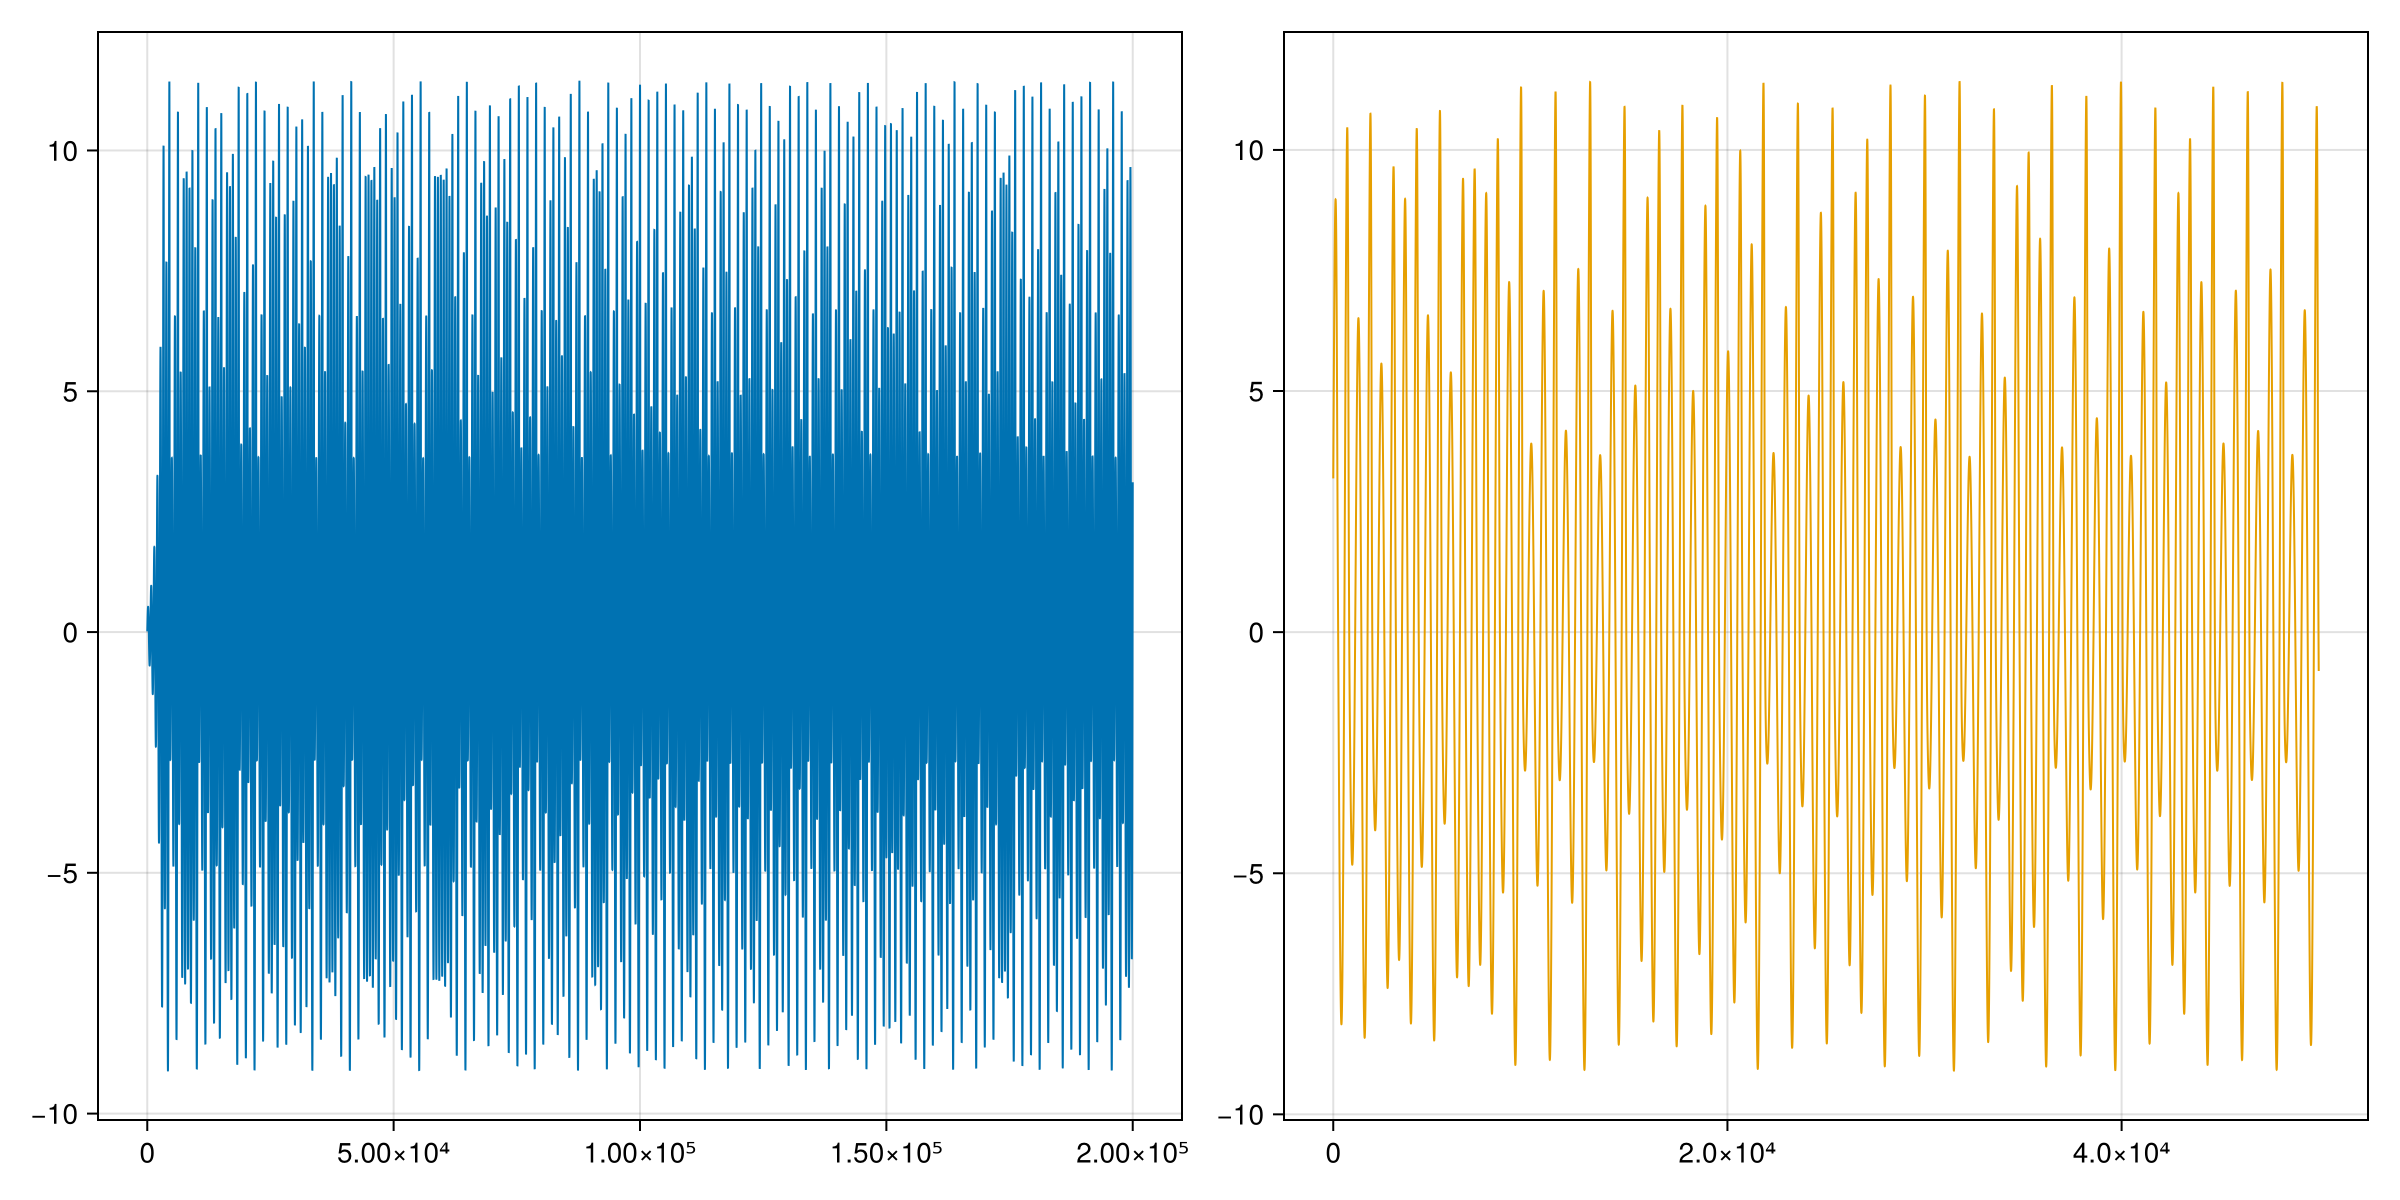

In [5]:
ro_train = vec(readdlm("../Data/rossler_train_0_01.txt"))
ro_test = vec(readdlm("../Data/rossler_test_0_01.txt"))

fig = Figure( size = (1200,600) )
lines!(Axis(fig[1,1]), ro_train; linewidth = 1.0, color = Cycled(1))
lines!(Axis(fig[1,2]), ro_test; linewidth = 1.0, color = Cycled(2))
fig

# Demonstrations

## Testing ON and reservoir creation

In [4]:
test_ON_part_adjacency = [
    0.7 0.1 0.2;
    0 0.7 0.3;
    0.4 0 0.6
]

k = 8
d = 3
ρ = 2.0
α = 1.0
η = 1/maximum(lo_train)
β = 0.001

ESN_params = create_ESN_params(k, d, ρ, α, η, β, num_partitions=3, ON_part_adjacency=test_ON_part_adjacency)

DataFrame(ESN_params.V_rec, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.489014,0.0,0.0,0.277827,0.303012,0.0,0.0459777,0.119783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239566,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.489014,0.0,0.3315,0.521985,0.27719,0.0,0.0,0.55333,0.0,0.119783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239566,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.3315,0.0,0.51903,0.770478,0.0,0.608116,0.61737,0.0,0.0,0.119783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239566,0.0,0.0,0.0,0.0,0.0
4,0.0,0.521985,0.51903,0.0,0.17309,0.0,0.0,0.00128132,0.0,0.0,0.0,0.119783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239566,0.0,0.0,0.0,0.0
5,0.277827,0.27719,0.770478,0.17309,0.0,0.0,0.0,0.140871,0.0,0.0,0.0,0.0,0.119783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239566,0.0,0.0,0.0
6,0.303012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239566,0.0,0.0
7,0.0,0.0,0.608116,0.0,0.0,0.0,0.0,0.173891,0.0,0.0,0.0,0.0,0.0,0.0,0.119783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239566,0.0
8,0.0459777,0.55333,0.61737,0.00128132,0.140871,0.0,0.173891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239566
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.611852,0.0,0.0,0.0,0.0,0.397839,0.0,0.359349,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
m = 3
k = 4
part_connection=0.5
d = k*0.05
ρ = 1.2
α = 1.0
η = 1/maximum(lo_train)
β = 0.001
w = 1
τ = 2

window_size = (m-1)*τ
    
part_symbols_train, unique_partitions_train = create_ordinal_partition(lo_train, m, w, τ)
trans_adjacency_matrix = create_transition_matrix(part_symbols_train)
num_partitions = length(unique_partitions_train)
# trans_adjacency_map = trans_adjacency_matrix_to_map(trans_adjacency_matrix, num_partitions)

ESN_params = create_ESN_params(k, d, ρ, α, η, β, num_partitions=num_partitions, ON_part_adjacency=trans_adjacency_matrix)

R, train_states = train_one_step_pred(lo_train, ESN_params, partition_symbols=part_symbols_train)


part_symbols_test, unique_partitions_test = create_ordinal_partition(lo_test, m, w, τ, unique_partitions=unique_partitions_train)
preds, test_states = one_step_pred(lo_test, ESN_params, R, S = train_states[end,:], partition_symbols=part_symbols_test)

([0.0, 0.0, 0.0, 0.0, 12.152935916399073, 12.324474928544028, 14.221817397673746, 14.548489061433308, 14.495951621700982, 15.052110640308364  …  -5.356695733994229, -5.152224675347043, -4.969718945030223, -4.809143287675852, -4.67031690853868, -4.552951618172457, -4.456682656744022, -4.381086571736759, -4.3257168550372, -4.290113554342909], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; -0.6903577495500512 0.5328755027086409 … 0.765991203196973 -0.9981469053810245; -0.6903452151615885 0.5312422903530837 … 0.766653957042719 -0.9981403668120301])

In [6]:
trans_adjacency_matrix

6×6 Matrix{Float64}:
 0.977899   0.0219441  0.000157117  0.0       0.0        0.0
 0.0        0.007109   0.985782     0.007109  0.0        0.0
 0.0        0.0        0.007109     0.992891  0.0        0.0
 0.0        0.0        0.0          0.978036  0.0217561  0.000208192
 0.0047619  0.0        0.0          0.0       0.0047619  0.990476
 0.990566   0.0        0.0          0.0       0.0        0.00943396

In [7]:
DataFrame(ESN_params.V_rec, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.362927,0.0402013,0.0,0.0,0.0,0.000287837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0402013,0.0,0.0,0.0,0.000287837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0402013,0.0,0.0,0.0,0.000287837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.362927,0.0,0.0,0.0,0.0,0.0,0.0,0.0402013,0.0,0.0,0.0,0.000287837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.80594,0.0,0.0,0.0,0.0130236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.80594,0.0,0.0,0.0,0.0130236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.80594,0.0,0.0,0.0,0.0130236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.80594,0.0,0.0,0.0,0.0130236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.19258,0.0,1.81896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Demonstration of turning point error

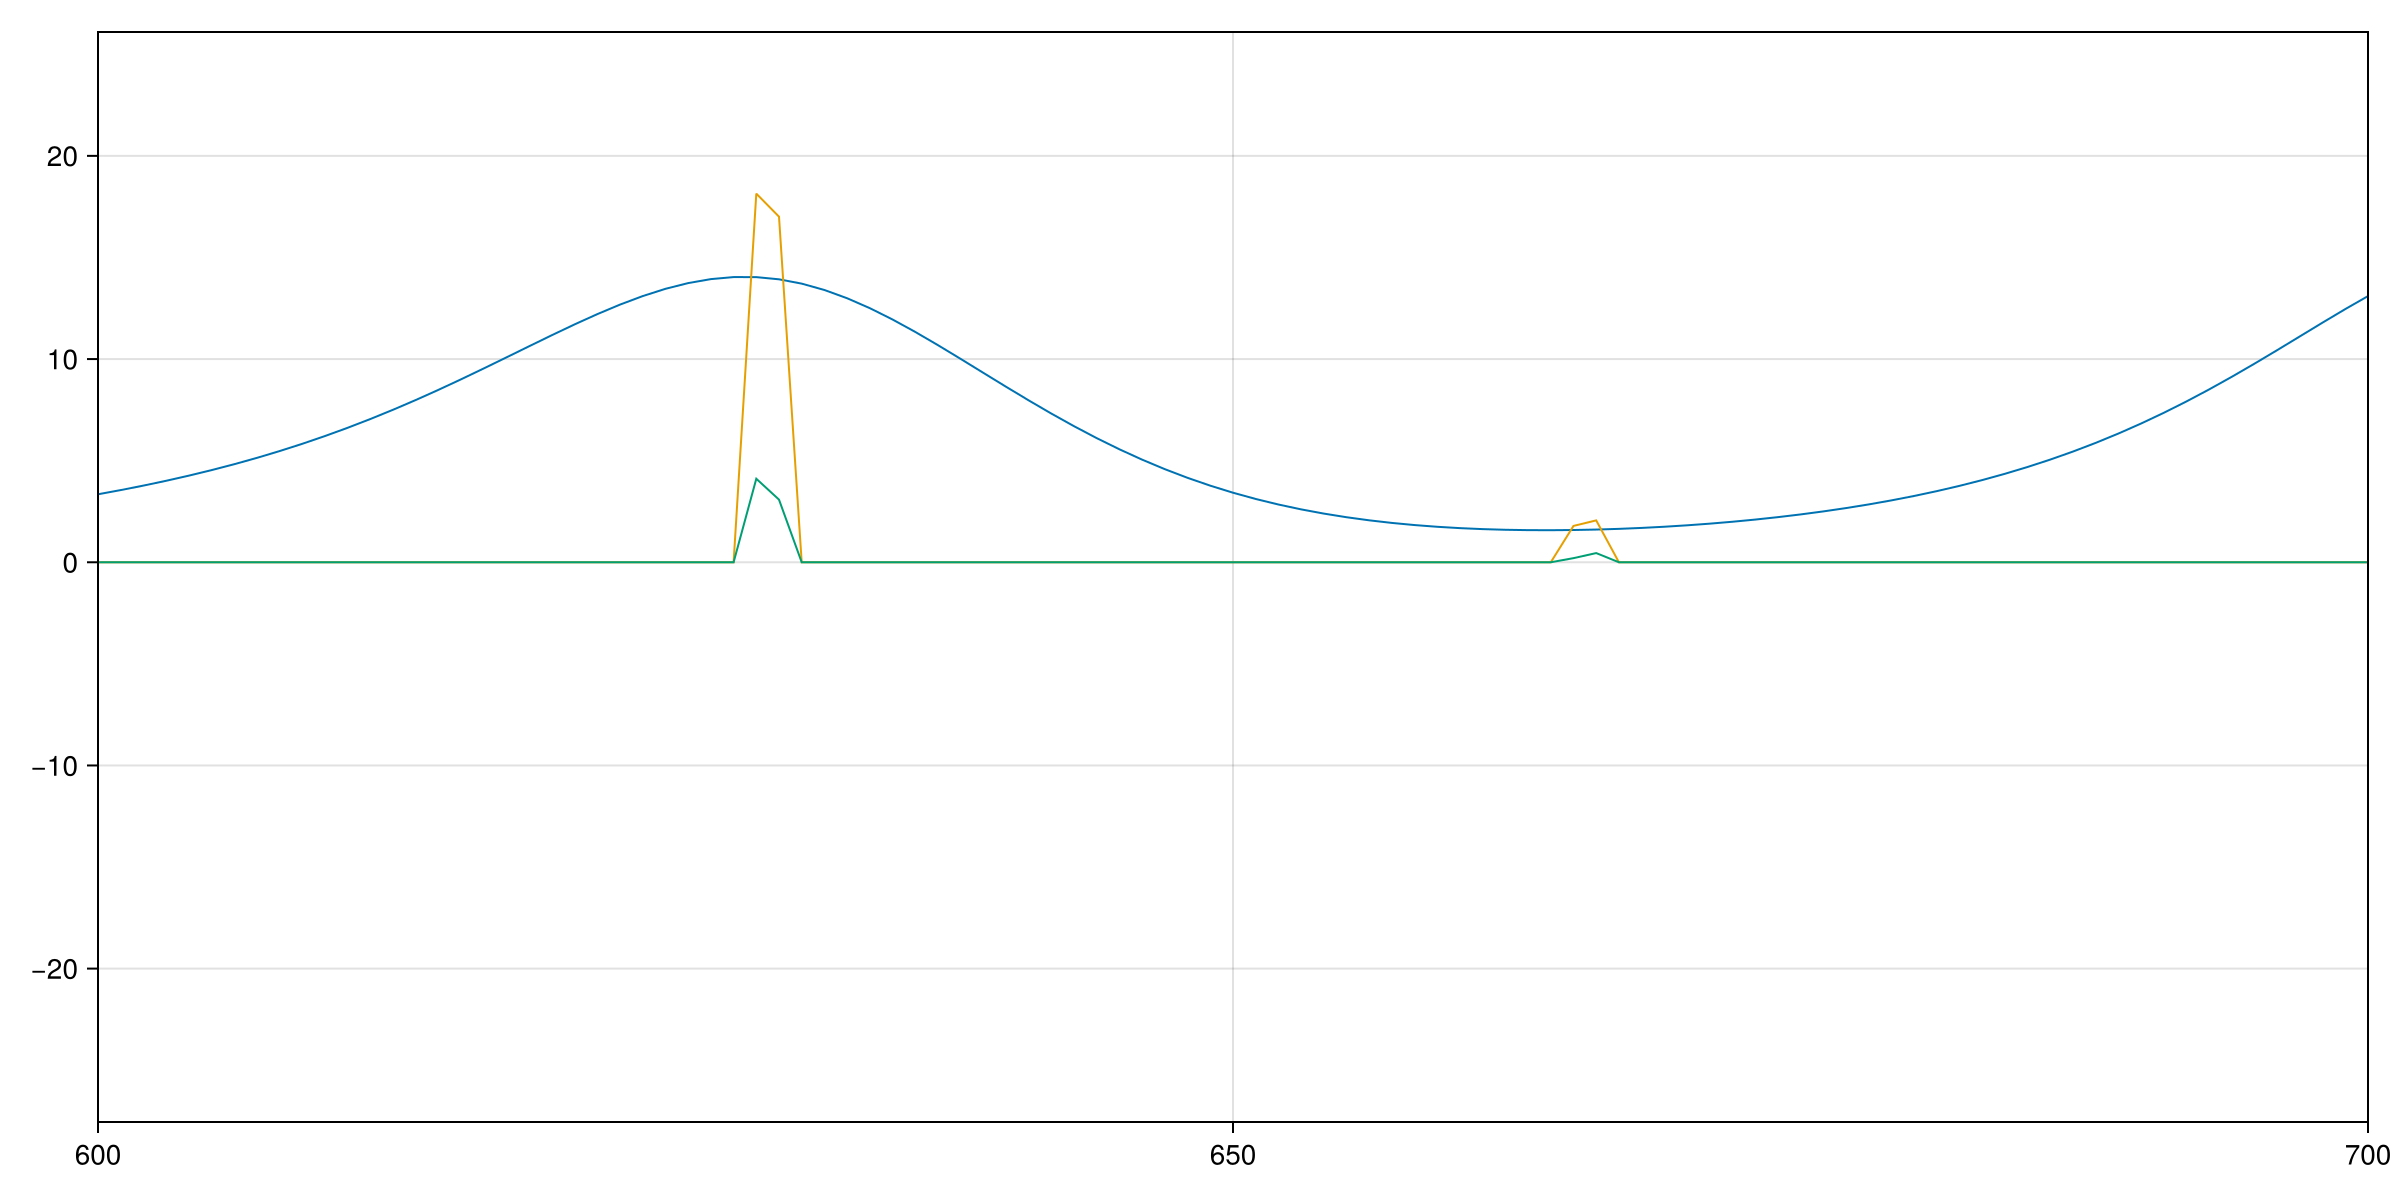

In [8]:
test_preds = lo_test + 3 * randn(length(lo_test))

test_mask = create_turning_partition_mask(lo_test, 4, 1, 1)
error = test_preds .- lo_test

fig = Figure( size = (1200,600))

ax1 = Axis(fig[1,1])
lines!(ax1, lo_test; linewidth = 1.0, color = Cycled(1))
lines!(ax1, test_preds .* test_mask; linewidth = 1.0, color = Cycled(2))
lines!(ax1, error .* test_mask; linewidth = 1.0, color = Cycled(3))

xlims!(600,700)

fig

In [ ]:
part_symbols, unique_parts = create_ordinal_partition(lo_train, 4, 1, 1)

In [ ]:
unique_parts

In [8]:
lo_train_01 = vec(readdlm("../Data/lorenz_train_0_01.txt"))
lo_test_01 = vec(readdlm("../Data/lorenz_test_0_01.txt"))

lo_train_05 = vec(readdlm("../Data/lorenz_train_0_05.txt"))
lo_test_05 = vec(readdlm("../Data/lorenz_test_0_05.txt"))
;

In [9]:
length(lo_train_01)

40000

In [10]:
length(lo_train_05)

8000

In [1]:
using JSON

# Example test result
test1 = Dict(
    "results" => [1, 2, 2, 4, 6, 7, 8, 9, 9, 9],
    "parameter_a" => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "other_parameters" => Dict(
        "parameter_b" => 3,
        "parameter_c" => 0.1,
        "parameter_d" => true,
        "parameter_e" => false
    )
)

# Write to JSON
open("test1.json", "w") do f
    JSON.print(f, test1)
end

# Another example test
test2 = Dict(
    "results" => [1, 2, 3, 6, 5, 7, 8, 9, 8, 9],
    "parameter_b" => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "other_parameters" => Dict(
        "parameter_a" => 2,
        "parameter_c" => 0.1,
        "parameter_d" => true,
        "parameter_e" => false
    )
)

open("test2.json", "w") do f
    JSON.print(f, test2)
end

<!-- # Single step predictions -->